<a href="https://colab.research.google.com/github/meiqingli/dssj_summer2022/blob/main/dssj_publishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data preprocessing (based on module 02 notebook 1)

In [ ]:
# Imports pandas for working with csv data
import pandas as pd 

# Github url with comments data
url_comments = 'https://gist.githubusercontent.com/meiqingli/5d83de4c508a0564359b2dd07c6839b1/raw/a83a44b0a85ac8ccc10f717495ff6a85c2f93878/comments.csv'

# Github url with post data
url_posts = 'https://gist.githubusercontent.com/meiqingli/2d128e1cac170d71b3820c51c6c3766e/raw/5be159378011713f1daaca4d683bb6875d11f61f/submissions.csv'

# Reads the csv comments file from github
df_comments = pd.read_csv(url_comments)

# Reads the csv posts file from github
df_posts = pd.read_csv(url_posts)

In [ ]:
# Tells us about the general shape of the dfs
df_comments.shape

(19538, 11)

In [ ]:
df_posts.shape

(7330, 18)

In [ ]:
# Shows us the first 3 rows in the dfs
df_comments.head(3)

,idint,idstr,created,author,parent,submission,body,score,subreddit,distinguish,textlen
0,26160907768,t1_c0nj1mg,1270490234,judycullins,t3_bmr3z,t3_bmr3z,8 great tips to start marketing your book onli...,1,publishing,NaN,68
1,26186732829,t1_c12wkd9,1287609142,inigo_montoya,t3_dtpk6,t3_dtpk6,I think it's extremely hard to find a salaried...,1,publishing,NaN,407
2,26186750085,t1_c12wxol,1287615269,[deleted],t1_c12wkd9,t3_dtpk6,"Honestly, I think I would be very happy either...",1,publishing,NaN,570


In [ ]:
df_posts.head(3)

,idint,idstr,created,self,nsfw,author,title,url,selftext,score,subreddit,distinguish,textlen,num_comments,flair_text,flair_css_class,augmented_at,augmented_count
0,12378361,t3_7db7d,1226647810,0,0,soulajax,Do-It-Yourself Book Press,http://nomediakings.org/doityourself/doityours...,NaN,1,publishing,NaN,0,0,NaN,NaN,NaN,NaN
1,16624895,t3_9wbun,1256143924,0,0,bookmarked,Blending the Old with the New: Backlist Titles...,http://www.thomasriggs.net/blog/index.php/2009...,NaN,1,publishing,NaN,0,0,NaN,NaN,NaN,NaN
2,17431958,t3_adml2,1260547827,0,0,bookmarked,A Little Something Extra,http://www.thomasriggs.net/blog/index.php/2009...,NaN,1,publishing,NaN,0,0,NaN,NaN,NaN,NaN


In [ ]:
# Allows us to see which columns our dfs have
list(df_comments)

['idint',
 'idstr',
 'created',
 'author',
 'parent',
 'submission',
 'body',
 'score',
 'subreddit',
 'distinguish',
 'textlen']

In [ ]:
list(df_posts)

['idint',
 'idstr',
 'created',
 'self',
 'nsfw',
 'author',
 'title',
 'url',
 'selftext',
 'score',
 'subreddit',
 'distinguish',
 'textlen',
 'num_comments',
 'flair_text',
 'flair_css_class',
 'augmented_at',
 'augmented_count']

In [ ]:
# Drops less useful columns from our dfs
# Made new dfs rather than overwriting the originals in case people have different thoughts about what to drop
# 'distinguish' column identifies whether the poster is a moderator, which is potentially interesting, but it's almost always empty so I dropped it
df_comments_short = df_comments.drop(['subreddit', 'distinguish'], axis=1)

In [ ]:
df_posts_short = df_posts.drop(['subreddit', 'url', 'distinguish', 'flair_text', 'flair_css_class', 'augmented_at', 'augmented_count'], axis=1)

In [ ]:
# To visualize the new dfs
df_comments_short.head(3)

,idint,idstr,created,author,parent,submission,body,score,textlen
0,26160907768,t1_c0nj1mg,1270490234,judycullins,t3_bmr3z,t3_bmr3z,8 great tips to start marketing your book onli...,1,68
1,26186732829,t1_c12wkd9,1287609142,inigo_montoya,t3_dtpk6,t3_dtpk6,I think it's extremely hard to find a salaried...,1,407
2,26186750085,t1_c12wxol,1287615269,[deleted],t1_c12wkd9,t3_dtpk6,"Honestly, I think I would be very happy either...",1,570


In [ ]:
df_comments_short.shape

(19538, 9)

In [ ]:
df_posts_short.head(3)

,idint,idstr,created,self,nsfw,author,title,selftext,score,textlen,num_comments
0,12378361,t3_7db7d,1226647810,0,0,soulajax,Do-It-Yourself Book Press,NaN,1,0,0
1,16624895,t3_9wbun,1256143924,0,0,bookmarked,Blending the Old with the New: Backlist Titles...,NaN,1,0,0
2,17431958,t3_adml2,1260547827,0,0,bookmarked,A Little Something Extra,NaN,1,0,0


In [ ]:
df_posts_short.shape

(7330, 11)

In [ ]:
# Selects all rows that don't have 'removed' or 'deleted' in certain columns
df_comments_noBlanks = df_comments_short.loc[~df_comments_short['body'].isin(['[removed]', '[deleted]' ]),:]
df_posts_noBlanks = df_posts_short.loc[~df_posts_short['selftext'].isin(['[removed]', '[deleted]' ]),:]

In [ ]:
# Drops rows with null values in 'selftext' column (assuming we want to analyze 'selftext')
# Overwrites the previous dfs because I don't think we'll need access to the intermediate dfs (and I was running out of name ideas)
df_comments_noBlanks = df_comments_noBlanks.dropna(subset=['body'])
df_posts_noBlanks = df_posts_noBlanks.dropna(subset=['selftext'])

In [ ]:
df_comments_noBlanks.head()

,idint,idstr,created,author,parent,submission,body,score,textlen
0,26160907768,t1_c0nj1mg,1270490234,judycullins,t3_bmr3z,t3_bmr3z,8 great tips to start marketing your book onli...,1,68
1,26186732829,t1_c12wkd9,1287609142,inigo_montoya,t3_dtpk6,t3_dtpk6,I think it's extremely hard to find a salaried...,1,407
2,26186750085,t1_c12wxol,1287615269,[deleted],t1_c12wkd9,t3_dtpk6,"Honestly, I think I would be very happy either...",1,570
3,26186762112,t1_c12x6yo,1287619770,inigo_montoya,t1_c12wxol,t3_dtpk6,"Well, an acquisitions editor is a very differe...",1,926
4,26186949360,t1_c1317g0,1287704175,[deleted],t1_c12x6yo,t3_dtpk6,"Yes, ""not panning out"" is precisely where I am...",1,315


In [ ]:
df_comments_noBlanks.shape
# Final number of comments

(19054, 9)

In [ ]:
df_posts_noBlanks.head()

,idint,idstr,created,self,nsfw,author,title,selftext,score,textlen,num_comments
7,23221158,t3_dtpk6,1287554803,1,0,[deleted],I am a recent graduate with no experience in t...,"I have no industry experience in publishing, b...",2,1007,5
12,25888930,t3_few0y,1296782293,1,0,mostrasho,Help r/publishing! I just got offered a (volun...,The editor who offered it is fully aware that ...,2,1027,2
17,29705825,t3_hop5t,1306892178,1,0,YouveBeenOneUpped,Reprints - Are there average costs?,Hey All. How much do short excerpt reprints ty...,2,188,4
62,40519459,t3_o4h0j,1325799133,1,0,hobbitlover,Need a writing program that works in InDesign ...,We use Microsoft Word at our office but it cre...,3,579,3
63,40711806,t3_o8lfi,1326069991,1,0,[deleted],Online ebook cover creator recommendations,"Hey guys,\n\nAny good recommendations on where...",1,75,1


In [ ]:
df_posts_noBlanks.shape
# Final number of posts

(2388, 11)

07/21/22 Questions

In [ ]:
#How frequently are people posting?
Unique_Post=df_posts_noBlanks.author.value_counts()
Unique_Post_Freq=df_posts_noBlanks.author.value_counts(normalize=True) #gives percent on each post. 

Unique_Post[100]
Unique_Post_Freq

[deleted]              0.029313
MaxFreedomMoussa       0.009631
PunkShocker            0.003769
TheRedWhale            0.003350
brisualso              0.003350
                         ...   
germy21                0.000419
annnnnnnnie            0.000419
ElUPTJefe              0.000419
kaybdoodles            0.000419
dimestorepublishing    0.000419
Name: author, Length: 1922, dtype: float64

In [ ]:
unique_users_comments = df_comments_noBlanks['author'].value_counts()
unique_users_comments 

stevehut                1327
JamieIsReading           264
blowinthroughnaptime     240
MaxFreedomMoussa         214
thespacebetweenwalls     190
                        ... 
prettyflyers11             1
whore-moanz                1
Distempa                   1
SortofaWeirdName           1
DaylanDaylan               1
Name: author, Length: 4033, dtype: int64

In [ ]:
#Characters in average post 

Text_Length1=df_posts_noBlanks.textlen.mean()
Text_Length1

Text_Length2=df_comments_noBlanks.textlen.mean()
Text_Length2

332.48163115356357

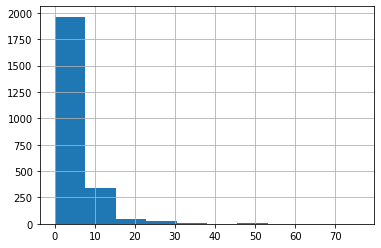

In [ ]:
df_posts_noBlanks.score.hist()

In [ ]:
df_posts_noBlanks.score

7       2
12      2
17      2
62      3
63      1
       ..
7321    3
7322    2
7326    8
7328    0
7329    8
Name: score, Length: 2388, dtype: int64

In [ ]:
df_posts_noBlanks.score

7       2
12      2
17      2
62      3
63      1
       ..
7321    3
7322    2
7326    8
7328    0
7329    8
Name: score, Length: 2388, dtype: int64

## Cleaning text data (based on module 02 notebook 1)

Text data collected in the real world is always going to be variable, which poses a challenge for analysis. But by reducing some of this variation, we can help improve our results. For example, if we are counting instances of the word `"weather"` in text, we might want the strings `"weather"`, `"weather."`, and `"Weather"` to all be counted as instances of the same word. However, in raw text form, these would be treated as separate strings. By performing text cleaning, we can standardize these cases and make our data easier to analyze. Some common preprocessing steps are:

- Removing punctuation
- Removing URLs
- Removing stopwords (non-content words like "a", "the", "is", etc.)
- Lowercasing
- Tokenization (e.g., splitting a sentence into distinct "chunks" or "tokens")
- Stemming, or removing the ends of words (e.g., places -> place)
- Lemmatization, or changing words to 'dictionary form' (e.g., runs, running, run -> run)

Fortunately, we don't need to code every one of these steps. Instead, we will use a package called [spaCy](https://spacy.io/) to do these things. If the text you'd like to process is general-purpose English language text (i.e., not domain-specific, like medical literature), `spaCy` is ready to use out-of-the-box. We will use the [`en_core_web_sm`](https://spacy.io/models/en/#en_core_web_sm) pipeline to cover the steps listed above. 

In [ ]:
df_posts_noBlanks.head(3)

,idint,idstr,created,self,nsfw,author,title,selftext,score,textlen,num_comments
7,23221158,t3_dtpk6,1287554803,1,0,[deleted],I am a recent graduate with no experience in t...,"I have no industry experience in publishing, b...",2,1007,5
12,25888930,t3_few0y,1296782293,1,0,mostrasho,Help r/publishing! I just got offered a (volun...,The editor who offered it is fully aware that ...,2,1027,2
17,29705825,t3_hop5t,1306892178,1,0,YouveBeenOneUpped,Reprints - Are there average costs?,Hey All. How much do short excerpt reprints ty...,2,188,4


In [ ]:
# Imports spaCy
import spacy

# Loads the English preprocessing pipeline
nlp = spacy.load('en_core_web_sm')

# Parses the first r/publishing post
parsed_post = nlp(df_posts_noBlanks.selftext.iloc[0])
print(parsed_post)

I have no industry experience in publishing, but would very much like to enter the field - specifically, editing. It seems as if the usual catch-22 holds true: to get the job, you need experience; to get experience, you need a job. Finding entry-level work is proving very difficult. I live in Baltimore, MD and I feel that I've exhausted the obvious avenues, sending my resume and cover letter to every magazine, newspaper, publishing house, etc., that I can locate. 

I am not opposed to internships, of course, but as I am not a college student, I tend to be excluded from consideration. Additionally, I have to support myself and so work-for-pay, in an obvious sense, takes priority.

I realize that there are only 10 readers in this subreddit, so this really is a shot in the dark, but I could use some advice from persons familiar with the industry. I've considered, as well, sending out a few emails to editors whose blogs I read, asking them for similar guidance. Would this be perceived as b

In [ ]:
# Print each sentence in the parsed post
for idx, sentence in enumerate(parsed_post.sents):
    print(f'Sentence {idx + 1}')
    print(sentence)
    print('')

Sentence 1
I have no industry experience in publishing, but would very much like to enter the field - specifically, editing.

Sentence 2
It seems as if the usual catch-22 holds true: to get the job, you need experience; to get experience, you need a job.

Sentence 3
Finding entry-level work is proving very difficult.

Sentence 4
I live in Baltimore, MD and I feel that I've exhausted the obvious avenues, sending my resume and cover letter to every magazine, newspaper, publishing house, etc., that I can locate.

Sentence 5


I am not opposed to internships, of course, but as I am not a college student, I tend to be excluded from consideration.

Sentence 6
Additionally, I have to support myself and so work-for-pay, in an obvious sense, takes priority.

Sentence 7


I realize that there are only 10 readers in this subreddit, so this really is a shot in the dark, but I could use some advice from persons familiar with the industry.

Sentence 8
I've considered, as well, sending out a few emai

In [ ]:
# Extract the first 15 items for the following properties of the parsed post

# The token text 
token_text = [token.orth_ for token in parsed_post][:15]   
# Part of speech 
token_pos = [token.pos_ for token in parsed_post][:15]   
# Lemma (or 'dictionary form')
token_lemma = [token.lemma_ for token in parsed_post][:15]
# Stop word? t/f
token_stop = [token.is_stop for token in parsed_post][:15]
# Puncutation? t/f
token_punct = [token.is_punct for token in parsed_post][:15]

# Make a dataframe with these items
pd.DataFrame(zip(token_text, token_pos, token_lemma, token_stop, token_punct),
             columns=['token_text', 'part_of_speech', 'token_lemma', 'token_stop', 'token_punct'])

,token_text,part_of_speech,token_lemma,token_stop,token_punct
0,I,PRON,I,True,False
1,have,VERB,have,True,False
2,no,DET,no,True,False
3,industry,NOUN,industry,False,False
4,experience,NOUN,experience,False,False
5,in,ADP,in,True,False
6,publishing,NOUN,publishing,False,False
7,",",PUNCT,",",False,True
8,but,CCONJ,but,True,False
9,would,AUX,would,True,False


In [ ]:
# preprocess the example sentence
test = nlp("That’s actually not true")
tokens = []
# For each token in the processed object
for token in test:
    # Check if the token is punctuation
    if not token.is_punct:
        # Append the lower-case lemma to the list
        tokens.append(token.lemma_.lower())
print(tokens)

['that', '’s', 'actually', 'not', 'true']


In [ ]:
test = nlp("I'm you’re he's he's That's that’s he’s he's father's father’s")
tokens = [token.lemma_.lower() for token in test if not token.is_punct]
for i, tokens in enumerate(tokens):
    print(i, tokens)

0 i
1 be
2 you
3 ’re
4 he
5 be
6 he
7 be
8 that
9 be
10 that
11 ’s
12 he
13 ’s
14 he
15 be
16 father
17 's
18 father
19 ’s


In [ ]:
test = nlp("I'm you’re he's he's That's that’s he’s he's father's father’s")
tokens = [token.lemma_.lower() if token.lemma_ != '-PRON-'
          else token.lower_
          for token in test if not token.is_punct and not token.is_digit]
leftover = ["'s",  "’s", "’"]
tokens_c = [token for token in tokens if not token in leftover]

for i, t in enumerate(tokens_c):
    print(i, t)

0 i
1 be
2 you
3 ’re
4 he
5 be
6 he
7 be
8 that
9 be
10 that
11 he
12 he
13 be
14 father
15 father


Preprocessing all data

In [ ]:
from gensim.models.phrases import Phrases, Phraser

In [ ]:
def clean(token):
    """Helper function that specifies whether a token is:
        - punctuation
        - space
        - digit
    """
    return token.is_punct or token.is_space or token.is_digit

def line_read(df, text_col='selftext'):
    """Generator function to read in text from df and get rid of line breaks."""    
    for text in df[text_col]:
        yield text.replace('\n', '')

def preprocess_posts(df, text_col='selftext', allowed_postags=['NOUN', 'ADJ']):
    """Preprocessing function to apply to the posts dataframe."""
    for parsed in nlp.pipe(line_read(df, text_col), batch_size=1000, disable=["ner"]):
        # Gather lowercased, lemmatized tokens
        tokens = [token.lemma_.lower() if token.lemma_ != '-PRON-'
                  else token.lower_ 
                  for token in parsed if not clean(token)]
        # Remove specific lemmatizations, and words that are not nouns or adjectives
        tokens = [lemma
                  for lemma in tokens
                  if not lemma in ["'s",  "’s", "’"] and not lemma in allowed_postags]
        # Remove stop words
        tokens = [token for token in tokens if token not in spacy.lang.en.stop_words.STOP_WORDS]
        yield tokens

# created a different preprocessing function for the comments df because the relevant column name is different
def preprocess_comments(df, text_col='body', allowed_postags=['NOUN', 'ADJ']):
    """Preprocessing function to apply to the comments dataframe."""
    for parsed in nlp.pipe(line_read(df, text_col), batch_size=1000, disable=["ner"]):
        # Gather lowercased, lemmatized tokens
        tokens = [token.lemma_.lower() if token.lemma_ != '-PRON-'
                  else token.lower_ 
                  for token in parsed if not clean(token)]
        # Remove specific lemmatizations, and words that are not nouns or adjectives
        tokens = [lemma
                  for lemma in tokens
                  if not lemma in ["'s",  "’s", "’"] and not lemma in allowed_postags]
        # Remove stop words
        tokens = [token for token in tokens if token not in spacy.lang.en.stop_words.STOP_WORDS]
        yield tokens

In [ ]:
# creates a list of lists of lemmas in each post
lemmas_posts = [line for line in preprocess_posts(df_posts_noBlanks)]

In [ ]:
len(lemmas_posts)
# confirms that there's a lemma list for each post

2388

In [ ]:
# shows the list of lemmas in the first post
lemmas_posts[0]

['industry',
 'experience',
 'publishing',
 'like',
 'enter',
 'field',
 'specifically',
 'edit',
 'usual',
 'catch-22',
 'hold',
 'true',
 'job',
 'need',
 'experience',
 'experience',
 'need',
 'job',
 'find',
 'entry',
 'level',
 'work',
 'prove',
 'difficult',
 'live',
 'baltimore',
 'md',
 'feel',
 'exhaust',
 'obvious',
 'avenue',
 'send',
 'resume',
 'cover',
 'letter',
 'magazine',
 'newspaper',
 'publishing',
 'house',
 'etc',
 'locate',
 'oppose',
 'internship',
 'course',
 'college',
 'student',
 'tend',
 'exclude',
 'consideration',
 'additionally',
 'support',
 'work',
 'pay',
 'obvious',
 'sense',
 'priority',
 'realize',
 'reader',
 'subreddit',
 'shot',
 'dark',
 'use',
 'advice',
 'person',
 'familiar',
 'industry',
 'consider',
 'send',
 'email',
 'editor',
 'blog',
 'read',
 'ask',
 'similar',
 'guidance',
 'perceive',
 'brazen']

In [ ]:
lemmas_posts[19]

['write',
 'poem',
 'book',
 'freshman',
 'year',
 'high',
 'school',
 'second',
 'year',
 'college',
 'dream',
 'publish',
 'poem',
 'know',
 'poem',
 'let',
 'book',
 'money',
 'order',
 'book',
 'copy',
 'think',
 'possible',
 'post',
 'online',
 'website',
 'recognize',
 'work',
 'anybody',
 'know',
 'help',
 'greatly',
 'appreciated']

In [ ]:
# creates a list of lists of lemmas in each comment
lemmas_comments = [line for line in preprocess_comments(df_comments_noBlanks)]

In [ ]:
# shows the list of lemmas in the first comment
lemmas_comments[0]

['great', 'tip', 'start', 'market', 'book', 'online', 'publish']

In [ ]:
# flattens the list of lists into one big list to facilitate counting lemma frequency
flat_lemmas_posts = [item for sublist in lemmas_posts for item in sublist]
flat_lemmas_posts[:30]

['industry',
 'experience',
 'publishing',
 'like',
 'enter',
 'field',
 'specifically',
 'edit',
 'usual',
 'catch-22',
 'hold',
 'true',
 'job',
 'need',
 'experience',
 'experience',
 'need',
 'job',
 'find',
 'entry',
 'level',
 'work',
 'prove',
 'difficult',
 'live',
 'baltimore',
 'md',
 'feel',
 'exhaust',
 'obvious']

In [ ]:
# creates a df to see which lemmas are the most frequent
from collections import Counter
posts_count = Counter(flat_lemmas_posts)

lemma_freq_df_posts = pd.DataFrame.from_dict(posts_count, orient='index').reset_index()
lemma_freq_df_posts = lemma_freq_df_posts.rename(columns={'index':'lemma', 0:'count'})
lemma_freq_df_posts.sort_values('count', ascending=False)[:30]

,lemma,count
201,book,3137
187,publish,1822
2,publishing,1425
17,work,1395
3,like,1283
120,know,1132
188,want,1063
290,publisher,1059
174,write,977
77,look,837


In [ ]:
# replicates this same process for the comments
flat_lemmas_comments = [item for sublist in lemmas_comments for item in sublist]
flat_lemmas_comments[:30]

['great',
 'tip',
 'start',
 'market',
 'book',
 'online',
 'publish',
 'think',
 'extremely',
 'hard',
 'find',
 'salaried',
 'position',
 'editor',
 'copy',
 'editor',
 'acquisition',
 'specify',
 'good',
 'economy',
 'industry',
 'shrink',
 'position',
 'turn',
 'rapidly',
 'tend',
 'mobility',
 'publishing',
 'organization',
 'gopher']

In [ ]:
comments_count = Counter(flat_lemmas_comments)

lemma_freq_df_comments = pd.DataFrame.from_dict(comments_count, orient='index').reset_index()
lemma_freq_df_comments = lemma_freq_df_comments.rename(columns={'index':'lemma', 0:'count'})
lemma_freq_df_comments.sort_values('count', ascending=False)[:30]

,lemma,count
4,book,10179
72,work,5765
321,publisher,5153
6,publish,4866
25,publishing,4497
17,good,4237
161,like,4042
323,want,3664
170,author,3409
941,agent,3215


In [ ]:
# adds lemmas column to new submissions csv
df_posts_noBlanks.insert(loc=5, column='lemmas', value=lemmas_posts)
df_posts_noBlanks = df_posts_noBlanks[~df_posts_noBlanks['lemmas'].isin([''])]
# df_posts_noBlanks.to_csv('submissions_lemmas.csv', index=False)

In [ ]:
# adds lemmas column to new comments csv
df_comments_noBlanks.insert(loc=7, column='lemmas', value=lemmas_comments)
df_comments_noBlanks = df_comments_noBlanks[~df_comments_noBlanks['lemmas'].isin([''])]
# df_comments_noBlanks.to_csv('comments_lemmas.csv', index=False)

Phrase Modeling with `gensim`

In [ ]:
from gensim.models.phrases import Phrases, Phraser

# Create bigram and trigram models
bigram = Phrases(lemmas, min_count=10, threshold=100)
trigram = Phrases(bigram[lemmas], min_count=10, threshold=50)  
bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)

# Form trigrams
trigrams = [trigram_phraser[bigram_phraser[doc]] for doc in lemmas]

NameError: ignored

In [ ]:
# Join each into a string
trigrams_joined = [' '.join(trigram) for trigram in trigrams]
trigrams_joined[5]

In [ ]:
trigram_phraser["That", "was", "not", "a", "big", "deal"]

In [ ]:
len(bigram_phraser.phrasegrams.keys())
#We can use .keys() to identify the bigrams in the dataset

In [ ]:
list(bigram_phraser.phrasegrams.keys())[:10]

In [ ]:
[trigram for trigram in list(trigram_phraser.phrasegrams.keys())]

Saving files

In [ ]:
# Inserting next to selftext column
df_posts_noBlanks.insert(loc=7, column='lemmas', value=trigrams_joined)
# Removing empty rows in lemmas
df_posts_noBlanks = df_posts_noBlanks[~df_posts_noBlanks['lemmas'].isin([''])]

In [ ]:
df_posts_noBlanks.head()

## Exploring Texts with `pandas` and `nltk` (based on Model 2 notebook 02)

In [ ]:
# Run if nltk is not installed
!pip install nltk

In [ ]:
# Sort dataframe by highest scores
df_posts_noBlanks.sort_values(by=['score'], ascending=True).head(3)
#highest is 76

Value Counts

In [ ]:
df_posts_noBlanks['self'].value_counts()

In [ ]:
df_posts_noBlanks['nsfw'].value_counts()

In [ ]:
df_posts_noBlanks['score'].value_counts()

In [ ]:
df_comments_noBlanks['parent'].value_counts()

In [ ]:
df_comments_noBlanks['submission'].value_counts()

type-token Ratio (TTR)

In [ ]:
def type_token_ratio(tokens):
    """Calculates type-token ratio on tokens."""
    numTokens = len(tokens)
    numTypes = len(set(tokens))
    return numTypes / numTokens

In [ ]:
for text in df_posts_noBlanks['lemmas'][100:105]:
    tokens = text.split()
    print('Text:\n', text)
    print('TTR:', type_token_ratio(tokens), '\n')

Processing and Analyzing Language with `Text()`

In [ ]:
tokens = []
for idx, row in enumerate(df_posts_noBlanks['lemmas']):
    # Notice that we put all tokens in the same list
    tokens.extend(row.split(' '))

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.text import Text

aita_tokens = Text(tokens)

In [ ]:
help(Text)

Concordances

In [ ]:
aita_tokens.concordance('Canada', width=75)

Collections

In [ ]:
aita_tokens.collocation_list()

Similar Words

In [ ]:
aita_tokens.similar('agent')

Common Context

In [ ]:
aita_tokens.common_contexts(['novel', 'fiction'])

Incorporating Time

In [ ]:
datetimes = pd.to_datetime(df_posts_noBlanks['created'], unit='s')

In [ ]:
df_posts_noBlanks.insert(loc=3, column='created_datetime', value=datetimes)
df_posts_noBlanks.head(3)

In [ ]:
df_2021 = df_posts_noBlanks.loc[pd.DatetimeIndex(df_posts_noBlanks['created_datetime']).year == 2021, :]
len(df_2021)

In [ ]:
df_2021.head(3)

In [ ]:
months_array = pd.DatetimeIndex(df_2021['created_datetime']).month_name()
months_array

# Module 2 Notebook 3: Term Frequency-Inverse Document Frequency (TF-IDF)



In [ ]:
import os
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer

corpus = [
  'Find an agent.',
  'I work at a publishing house in their marketing department.',
  'Yes, send your stuff to agents (no matter what you have done) and they can help you. ']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
# Use this if your scikit-learn is older
# pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

# Module 2 Notebook 3: Term Frequency-Inverse Document Frequency (TF-IDF) 
*JP


TF-IDF shows which words are most unique/relevant to the sample. High TF-IDF scores indicate high uniqueness. Lower scores may be that the words appear less frequently or that they are not very unique (don't provide much new information about the sample). Standard jargon like "literary" or "publish" may be on par for r/publishing.

In [ ]:
import os
import pandas as pd

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [ 'Find an agent.', 'I work at a publishing house in their marketing department.', 'Yes, send your stuff to agents (no matter what you have done) and they can help you. ']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,agent,agents,an,and,at,can,department,done,find,have,...,send,stuff,their,they,to,what,work,yes,you,your
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,1,0,1,0,1,0,1,0,1,...,1,1,0,1,1,1,0,1,2,1


In [ ]:
X.shape

In [ ]:
document1="There are several authors who have publicly demeaned self publishing.  It's a shame.  Honestly I think the best way to judge a perception is to gauge success.  We are all aware that there is just as much potential, which some authors have been able to capitalize, in self publishing as there is in the traditional route."
document2="All of the big six houses have summer internship programs--if you go to each of their websites, there's usually a link at the bottom of the page for careers and you should find internship info there. Have you considered literary agencies too? There are hundreds in Manhattan and they're always looking for interns. I work at a literary agency and started off as an intern. There isn't as much editing work at first but it's really invaluable experience. Good luck! """  
document3="Rarely do those nonstandard things cost the author money upfront, though. To me, there's a big difference between an agent wanting a manuscript single spaced when submitted vs. say one saying you need to pay for professional editing before submitting. When money comes into play (like paying for registering a copyright before you should realistically need one) red (or at least orange) flags go up."
test_list=[document1, document2, document3]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_df=0.85, stop_words='english')
word_count_vector = cv.fit_transform(test_list)
pd.DataFrame(word_count_vector.toarray(), columns=cv.get_feature_names_out())
# Use this if your scikit-learn is older
# pd.DataFrame(word_count_vector.toarray(), columns=cv.get_feature_names())

Using TfidfTransformer


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer() 
tfidf_transformer.fit(word_count_vector)

In [ ]:
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names_out(), columns=["idf_weights"]) 
df_idf.sort_values(by=['idf_weights'])

In [ ]:
tf_idf_vector = tfidf_transformer.transform(word_count_vector)

In [ ]:
feature_names = cv.get_feature_names_out() 


In [ ]:
df = pd.DataFrame(tf_idf_vector[2].T.todense(), index=feature_names, columns=["tfidf"]) 
df.sort_values(by=["tfidf"], ascending=False)

The most unique "relevant" words to these three given documents are: "money" and "need." Words like "work," "agencies," "manhattan" are at the bottom. 

We will apply this method to the rest of the corpus later.
